In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patches as mpatches
from scipy.integrate import odeint

In [2]:
lifetime_df = pd.read_csv('lifetime.csv')
y = (lifetime_df.risk / lifetime_df.Nstem).copy()
x = (np.log2(lifetime_df.Nstem) + lifetime_df.StemLifetimeDivisions).copy()

In [3]:
lifetime_df.head()

,CancerType,risk,Ncell,Nstem,msc,StemLifetimeDivisions,TotalStemDiv
0,Myeloid_leukemia,0.0041,3000000000000,135000000,12.0,960.0,130000000000
1,Basal_cell,0.3000,180000000000,5820000000,7.6,608.0,3550000000000
2,Lymph_leukemia,0.0052,3000000000000,135000000,12.0,960.0,130000000000
3,Colorectal,0.0480,30000000000,200000000,73.0,5840.0,1170000000000
4,Colorectal_FAP,1.0000,30000000000,200000000,73.0,5840.0,1170000000000


In [4]:
cancs = list(lifetime_df.CancerType) 
cancs = [canc.replace('_', ' ') for canc in cancs]
cancs = [canc.replace('Osteosarcoma', 'Ost') for canc in cancs]

# Fig 4

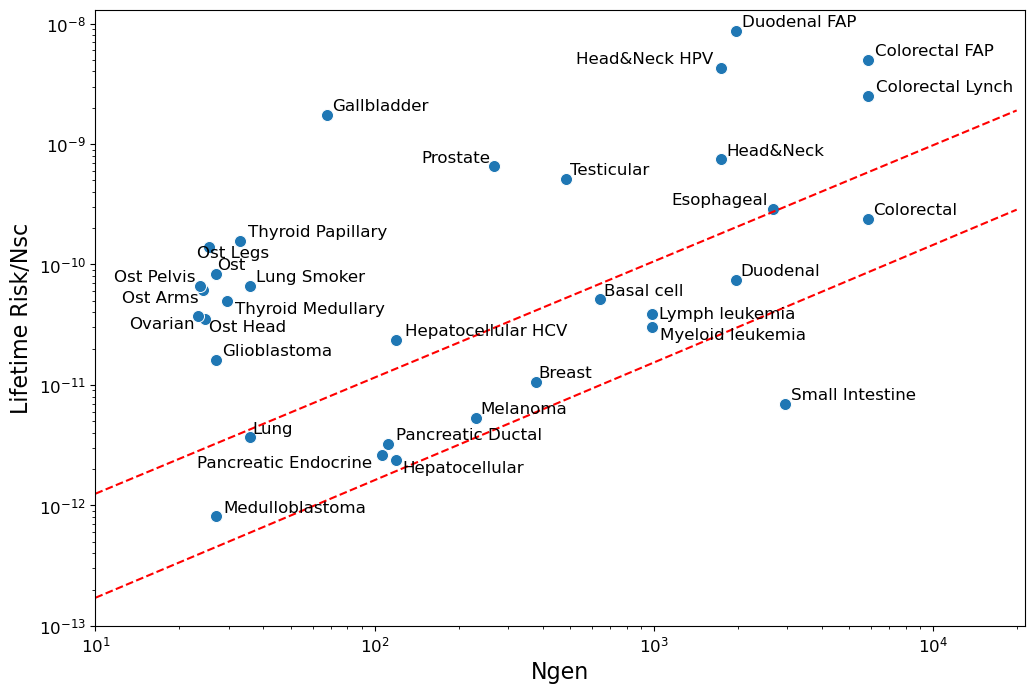

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x, y=y, s=75)

# for i in range(len(x)):
#     plt.annotate(lifetime_df['Tipo de Cáncer'][i], (x[i], y[i]))

r11 = 1.25*1e-12
r12 = 1.25*1e-9
r21 = 1.9e-13
r22 = 1.9e-10
x1 = 1e1
x2 = 1e4
m1 = (r12-r11)/(x2-x1)
m2 = (r22-r21)/(x2-x1)

plt.plot([x1, 2*x2],[r11, 10*r22],color='r',linestyle = 'dashed')
plt.plot([x1, 2*x2],[0.9*r21, 1.5*r22],color='r',linestyle = 'dashed')


plt.xscale("log")
plt.yscale("log")

ax = plt.gca()
TEXTS = []
for idx, cancer in enumerate(cancs):
    p, q = x[idx], y[idx]
    TEXTS.append(ax.text(p, q, cancer, fontsize=12, ha='center', va='center'))
    
adjust_text(
    TEXTS, 
    expand_points=(1.1, 1.1),
    #arrowprops=dict(arrowstyle="-", lw=1, color='w', alpha=0.01),
    ax=ax
)
    
plt.xlim(x1, 2.15*x2)
plt.ylim(10**(-13), 1.3*10**(-8))
plt.xlabel('Ngen', size=16)
plt.ylabel('Lifetime Risk/Nsc', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylabel(r'$Riesgo/N_{sc}$', size=12)
#plt.savefig('fig4.pdf', bbox_inches='tight')
plt.show()

# Fig 1

In [6]:
def rhs(P):
    a = 0.6
    b = 1.5
    Ps = 20
    Cinf = 5
    
    return(a * P * (1 - P/Ps) - b * P / (1 + Cinf * P))

x = np.linspace(0, 1, 100)
y = rhs(x)

Text(0, 0.5, 'r.h.s')

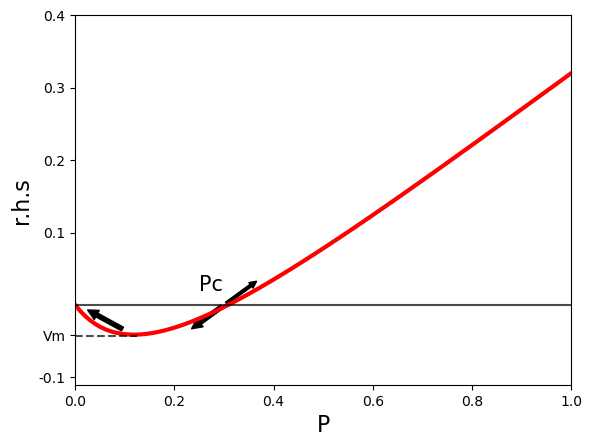

In [7]:
fig, ax = plt.subplots()

ax.plot(x, y, c='r', lw=3)
ax.axhline(0, ls='-', c='k', alpha=0.7)

x_tail, y_tail = 0.3, 0
x1, y1 = x_tail + 0.07, y_tail + 0.035
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x1, y1),
                               mutation_scale=10, fc='k')
ax.add_patch(arrow)

x1, y1 = x_tail - 0.07, y_tail - 0.035
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x1, y1),
                               mutation_scale=15, fc='k')
ax.add_patch(arrow)

x_tail, y_tail = 0.1, -0.035
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (0.02, -0.005),
                               mutation_scale=15, fc='k')
ax.add_patch(arrow)

Vm = -0.0425
plt.yticks([-0.1, Vm+0.000625, 0.1, 0.2, 0.3, 0.4], [-0.1, 'Vm', 0.1, 0.2, 0.3, 0.4])
plt.plot([0, 0.125], [Vm, Vm], c='k', ls='--', alpha=0.7)

plt.text(0.25, 0.02, 'Pc', fontsize=15)

plt.xlim(0, 1)
plt.ylim(-0.11, 0.4)
plt.xlabel('P', size=16)
plt.ylabel('r.h.s', size=16)
#plt.grid()
#plt.savefig('fig1.pdf', bbox_inches='tight')

# Fig 2

In [8]:
def rhs2(P, t):
    a = 0.6
    b = 1.5
    Ps = 20
    Cinf = 5
    af = 0.05
    
    return(af+ a * P * (1 - P/Ps) - b * P / (1 + Cinf * P))

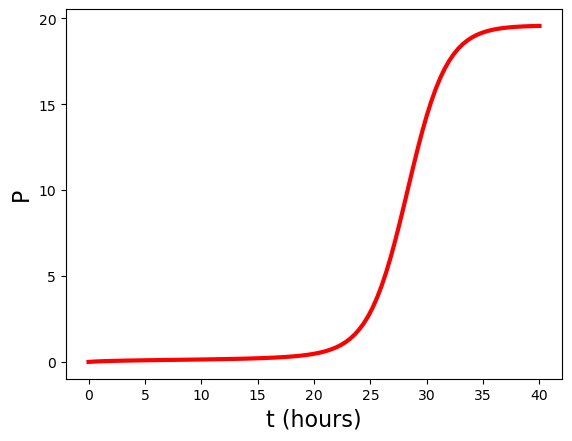

In [9]:
p0 = 0
t = np.linspace(0, 40, 101)
P = odeint(rhs2, p0, t)

plt.plot(t, P, c='r', lw=3)
plt.xlabel('t (hours)', size=16)
plt.ylabel('P', size=16)
plt.yticks(np.arange(0, 21, 5))
#plt.savefig('fig2.pdf', bbox_inches='tight')
plt.show()

# Fig 3

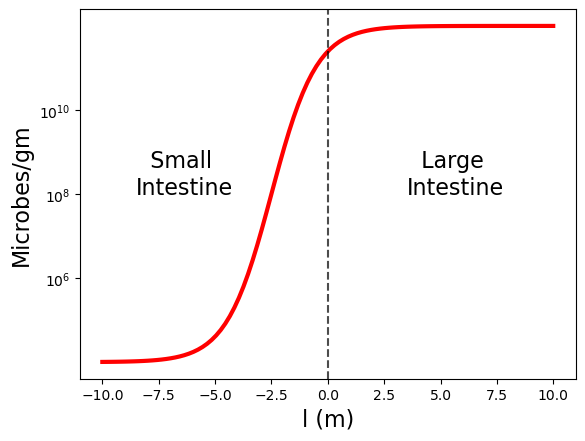

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x+2.5)

plt.plot(x, y, c='r', lw=3)
plt.axvline(0, ls='--', alpha=0.7, color='k')

plt.text(-8.5, 0.5, '  Small\nIntestine', fontsize=16)
plt.text(3.5, 0.5, '  Large\nIntestine', fontsize=16)

plt.yticks([0.25, 0.50, 0.75], [r'$10^6$', r'$10^8$', r'$10^{10}$'])
plt.xlabel('l (m)', size=16)
plt.ylabel('Microbes/gm', size=16)
#plt.savefig('fig3.pdf', bbox_inches='tight')
plt.show()